# Exercice de visualisation

Vous disposez du jeu de données *exercice_dataset.csv* dans le dossier Data du répertoire courant et on vous demande de refaire le graphique ci-dessous. Bonne chance !


<img src="image_graphique.png">

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies = pd.read_csv("Data/exercice_dataset.csv", encoding="latin1")

In [3]:
movies.head()

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


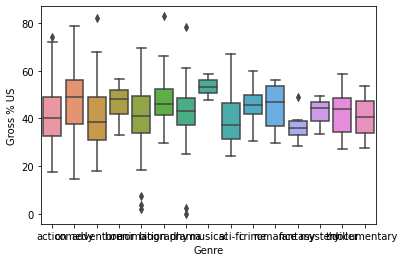

In [4]:
# On fait le boxplot
sns.boxplot(data=movies, x='Genre', y='Gross % US');

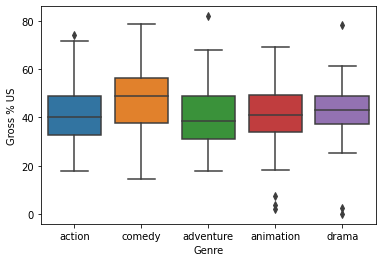

In [5]:
# Problème : trop de genres on va filtre
filtre = movies['Genre'].isin(['action', 'comedy', 'adventure', 'animation', 'drama'])
movies = movies.loc[filtre]

sns.boxplot(data=movies, x='Genre', y='Gross % US');

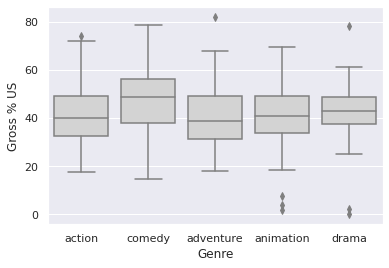

In [6]:
# Gestion des couleurs du boxplot et du fond
sns.set(style='darkgrid')

filtre = movies['Genre'].isin(['action', 'comedy', 'adventure', 'animation', 'drama'])
movies = movies.loc[filtre]

ax = sns.boxplot(data=movies, x='Genre', y='Gross % US', color='lightgray')

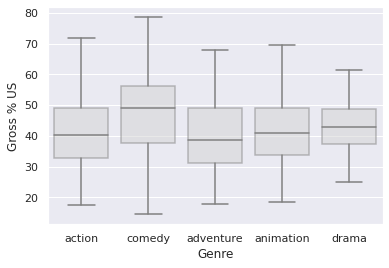

In [7]:
# Suppression des "outliers"
sns.set(style='darkgrid')

filtre = movies['Genre'].isin(['action', 'comedy', 'adventure', 'animation', 'drama'])
movies = movies.loc[filtre]

ax = sns.boxplot(data=movies, x='Genre', y='Gross % US', color='lightgray', showfliers=False)
plt.setp(ax.artists, alpha=0.5);

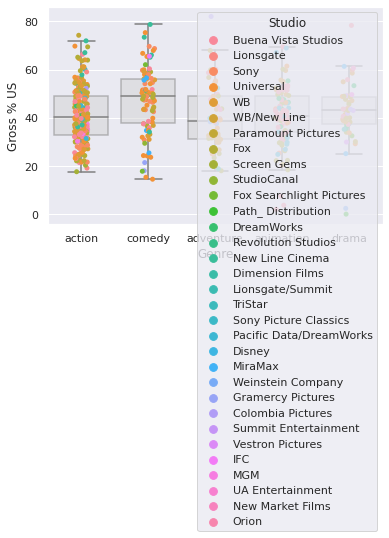

In [8]:
# Ajout du stripplot
sns.set(style='darkgrid')

filtre = movies['Genre'].isin(['action', 'comedy', 'adventure', 'animation', 'drama'])
movies = movies.loc[filtre]

ax = sns.boxplot(data=movies, x='Genre', y='Gross % US', color='lightgray', showfliers=False)
plt.setp(ax.artists, alpha=0.5)

sns.stripplot(data=movies, x='Genre', y='Gross % US', hue='Studio');

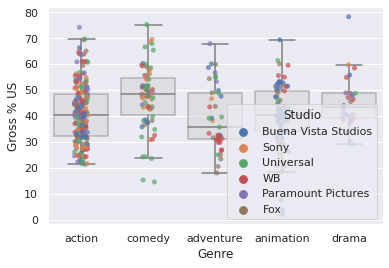

In [9]:
# Filtre sur les studio
sns.set(style='darkgrid')

filtre = movies['Genre'].isin(['action', 'comedy', 'adventure', 'animation', 'drama'])
filtre2 = movies['Studio'].isin(['Buena Vista Studios', 'Sony', 'Universal', 'WB', 'Paramount Pictures', 'Fox'])
movies = movies.loc[filtre & filtre2]

ax = sns.boxplot(data=movies, x='Genre', y='Gross % US', color='lightgray', showfliers=False)
plt.setp(ax.artists, alpha=0.5)

sns.stripplot(data=movies, x='Genre', y='Gross % US', hue='Studio', alpha = 0.7);

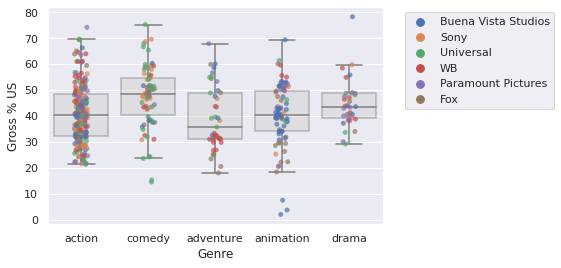

In [10]:
# Filtre sur les studio
sns.set(style='darkgrid')

filtre = movies['Genre'].isin(['action', 'comedy', 'adventure', 'animation', 'drama'])
filtre2 = movies['Studio'].isin(['Buena Vista Studios', 'Sony', 'Universal', 'WB', 'Paramount Pictures', 'Fox'])
movies = movies.loc[filtre & filtre2]

ax = sns.boxplot(data=movies, x='Genre', y='Gross % US', color='lightgray', showfliers=False)
plt.setp(ax.artists, alpha=0.5)

sns.stripplot(data=movies, x='Genre', y='Gross % US', hue='Studio', alpha = 0.7)

ax.legend(bbox_to_anchor=(1.05,1));

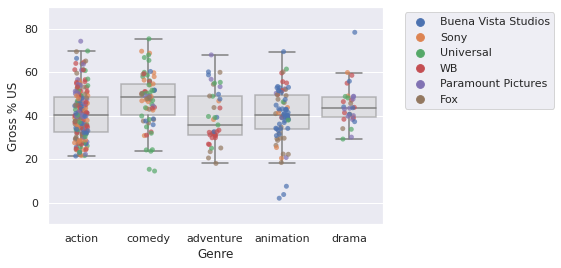

In [11]:
# Modifier l'échelle de y
sns.set(style='darkgrid')

filtre = movies['Genre'].isin(['action', 'comedy', 'adventure', 'animation', 'drama'])
filtre2 = movies['Studio'].isin(['Buena Vista Studios', 'Sony', 'Universal', 'WB', 'Paramount Pictures', 'Fox'])
movies = movies.loc[filtre & filtre2]

ax = sns.boxplot(data=movies, x='Genre', y='Gross % US', color='lightgray', showfliers=False)
plt.setp(ax.artists, alpha=0.5)

sns.stripplot(data=movies, x='Genre', y='Gross % US', hue='Studio', alpha = 0.7)

ax.set_ylim(-10,90)
ax.legend(bbox_to_anchor=(1.05,1));

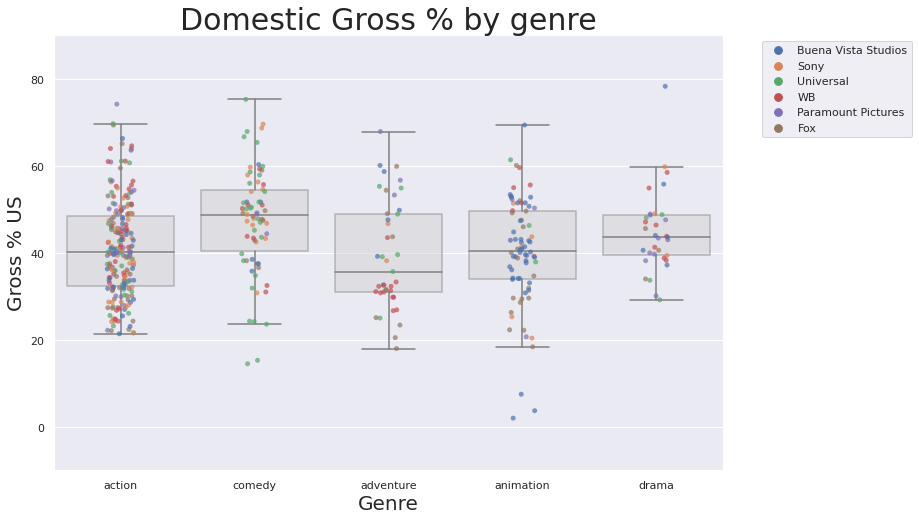

In [12]:
# Les titres et la taille de la figure
sns.set(style='darkgrid')

plt.figure(figsize=(12,8))

filtre = movies['Genre'].isin(['action', 'comedy', 'adventure', 'animation', 'drama'])
filtre2 = movies['Studio'].isin(['Buena Vista Studios', 'Sony', 'Universal', 'WB', 'Paramount Pictures', 'Fox'])
movies = movies.loc[filtre & filtre2]

ax = sns.boxplot(data=movies, x='Genre', y='Gross % US', color='lightgray', showfliers=False)
plt.setp(ax.artists, alpha=0.5)

sns.stripplot(data=movies, x='Genre', y='Gross % US', hue='Studio', alpha = 0.7)

ax.set_ylim(-10,90)
ax.legend(bbox_to_anchor=(1.05,1))

ax.set_title('Domestic Gross % by genre', fontsize=30)
ax.set_xlabel('Genre', fontsize=20)
ax.set_ylabel('Gross % US', fontsize=20);

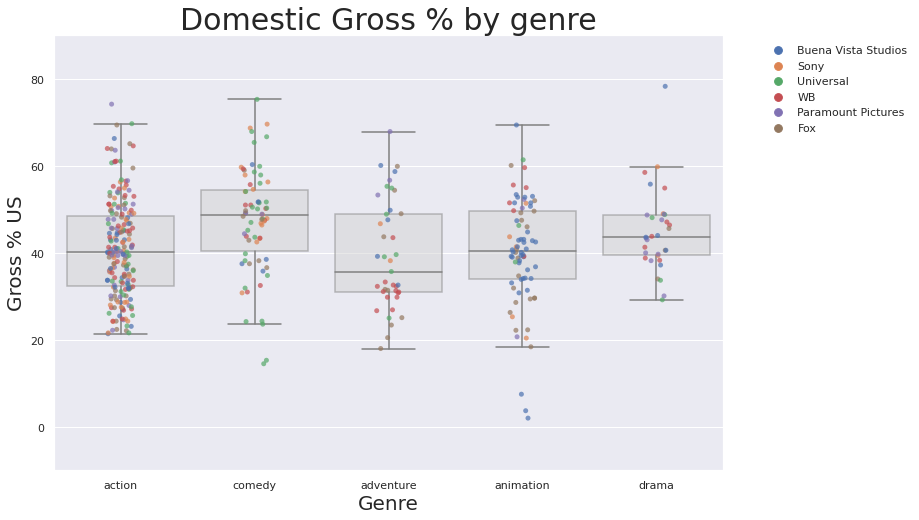

In [21]:
# Modification de la légende
sns.set(style='darkgrid')

plt.figure(figsize=(12,8))

filtre = movies['Genre'].isin(['action', 'comedy', 'adventure', 'animation', 'drama'])
filtre2 = movies['Studio'].isin(['Buena Vista Studios', 'Sony', 'Universal', 'WB', 'Paramount Pictures', 'Fox'])
movies = movies.loc[filtre & filtre2]

ax = sns.boxplot(data=movies, x='Genre', y='Gross % US', color='lightgray', showfliers=False)
plt.setp(ax.artists, alpha=0.5)

sns.stripplot(data=movies, x='Genre', y='Gross % US', hue='Studio', alpha = 0.7)

ax.set_ylim(-10,90)
ax.legend(bbox_to_anchor=(1.05,1), frameon=False)

ax.set_title('Domestic Gross % by genre', fontsize=30)
ax.set_xlabel('Genre', fontsize=20)
ax.set_ylabel('Gross % US', fontsize=20);